Projeto simples para demonstrar como um algoritmo consegue organizar textos semelhantes em grupos, mesmo sem saber previamente sobre quais temas eles tratam.

Import das bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD



Dataset bem simples de frases curtas

In [ ]:
texts = [
    "O gato dorme no sofá",
    "O cachorro corre no parque",
    "Animais precisam de cuidados veterinários",
    "O filhote brinca com a bola",
    "O veterinário examina o cachorro",
    "O gato observa pela janela",
    "O mercado financeiro fechou em alta",
    "Investidores analisam ações",
    "A bolsa de valores caiu hoje",
    "O dólar subiu frente ao real",
    "Economia global enfrenta desafios",
    "Taxas de juros afetam investimentos",
    "A lua cheia iluminou o céu",
    "Estrelas podem ser vistas à noite",
    "Astronomia estuda o universo",
    "Telescópios observam planetas distantes",
    "A galáxia contém bilhões de estrelas",
    "O sistema solar possui oito planetas",
    "O time venceu o campeonato",
    "O jogador marcou dois gols",
    "O estádio estava lotado",
    "O técnico definiu a estratégia",
    "A partida terminou empatada",
    "Os torcedores comemoraram a vitória"
]


#o modelo não sabe sobre quais temas os textos tratam.


Transforma texto em número

In [ ]:
vectorizer = TfidfVectorizer(
    lowercase=True
)

X = vectorizer.fit_transform(texts)
print("Shape da matriz:", X.shape)


Shape da matriz: (24, 89)


Aplica o algoritmo de agrupamentos KMeans

In [ ]:
k = 4  # número de grupos esperado
model = KMeans(n_clusters=k, random_state=42, n_init="auto")
clusters = model.fit_predict(X)

#esse algoritmo não sabe o que é animal, finanças ou esporte, ele apenas irá agrupar os textos pelo vocabulário semelhante



Visualiza os textos por grupo

In [ ]:
for i in range(k):
    print(f"\nGrupo {i}:")
    for text, cluster in zip(texts, clusters):
        if cluster == i:
            print(" -", text)



Grupo 0:
 - Animais precisam de cuidados veterinários
 - O filhote brinca com a bola
 - O gato observa pela janela
 - O mercado financeiro fechou em alta
 - Investidores analisam ações
 - A bolsa de valores caiu hoje
 - O dólar subiu frente ao real
 - Economia global enfrenta desafios
 - Taxas de juros afetam investimentos
 - A lua cheia iluminou o céu
 - Estrelas podem ser vistas à noite
 - Astronomia estuda o universo
 - A galáxia contém bilhões de estrelas
 - O time venceu o campeonato
 - O jogador marcou dois gols
 - O estádio estava lotado
 - A partida terminou empatada
 - Os torcedores comemoraram a vitória

Grupo 1:
 - Telescópios observam planetas distantes
 - O sistema solar possui oito planetas

Grupo 2:
 - O gato dorme no sofá
 - O cachorro corre no parque
 - O veterinário examina o cachorro

Grupo 3:
 - O técnico definiu a estratégia


Visualização

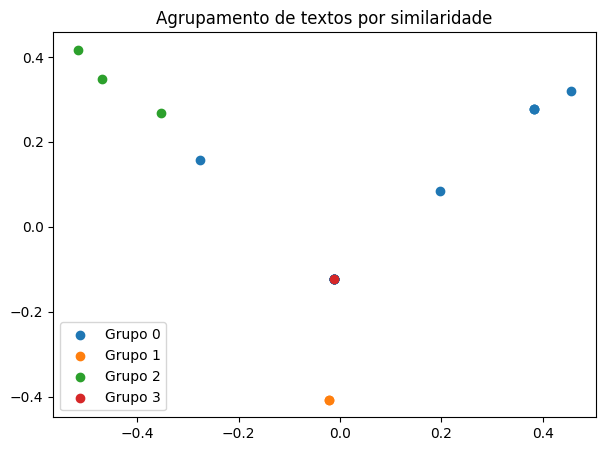

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X.toarray())

plt.figure(figsize=(7, 5))
for i in range(k):
    plt.scatter(
        X_2d[clusters == i, 0],
        X_2d[clusters == i, 1],
        label=f"Grupo {i}"
    )

plt.title("Agrupamento de textos por similaridade")
plt.legend()
plt.show()



*Cada cor representa um grupo descoberto automaticamente, isso indica que o modelo encontrou padrões reais de similaridade entre os textos. Um grupo reúne frases de esportes, outro de astronomia, outro de finanças, outro de animais.*

**O algoritmo KMeans não entende temas**, então ele não sabe o que é um animal, finanças ou astronomia, ele só pe capaz de agrupar as frases de compartilham palavras ou padr~]oes estatísticos semelhates.

Em frases muito curtas, é comum que termos genéricos dominem a similaridade, resultando em clusters amplos e outros mais específicos. Esse comportamento não representa erro do algoritmo, mas uma limitação natural dos dados, reforçando a natureza exploratória do **aprendizado não supervisionado.**